---
title: Making beautiful boxplots using plotnine in Python  
date: 2020-09-06    
comments: false  
tags: python, plotnine
keywords: python, plotnine, boxplot, ggplot, matplotlib

---

For the past year and a half, I have been switching gradually from using `matplotlib` to create graphs in Python to [Hassan Kibirige's](https://twitter.com/HKibirige) wonderful port of R's [`ggplot2`](https://ggplot2.tidyverse.org/), [`plotnine`](https://plotnine.readthedocs.io/en/stable/). When I was first starting to use this package, I found it was quite tricky to find clear instructions on how to make customisations or build some of the more specialised charts. As such, [Mauricio](https://twitter.com/pachamaltese) and I decided to create a series of tutorials on how to build and customise a range of charts in `plotnine`, going step-by-step from a basic plot to a highly customised graph. 

Today I am sharing our tutorial on how to create and customise boxplots in `plotnine`. If you enjoyed this blog post and found it useful, please consider buying our book! It contains chapters detailing how to build and customise 11 other chart types, including bar charts, line charts, scatterplots, histograms, density plots and regression plots (including all of the regression diagnostic plots available in R). You can get it for as little as US\$4.99 by clicking on the link below, and every purchase really helps us out with maintaining the content.

With that out of the way, let's get on with creating our boxplot in `plotnine`! In this tutorial, we will work towards creating the line plot below. We will take you from a basic line plot and explain all the customisations we add to the code step-by-step.

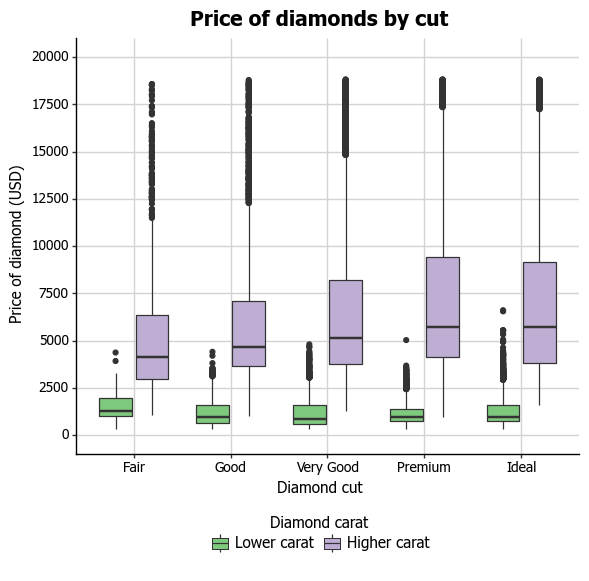

<ggplot: (308289073)>

In [28]:
p10 = (
    ggplot(diamonds, aes("cut", "price", fill="carat_c"))
    + geom_boxplot()
    + xlab("Diamond cut")
    + ylab("Price of diamond (USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
    + theme(
        legend_position="bottom",
        legend_direction="horizontal",
        legend_title_align="center",
        legend_box_spacing=0.4,
        legend_key=element_blank(),
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=15, family="Tahoma", face="bold"),
        text=element_text(family="Tahoma", size=11),
        axis_text_x=element_text(colour="black", size=10),
        axis_text_y=element_text(colour="black", size=10),
    )
    + scale_fill_brewer(type="qual", palette="Accent", name="Diamond carat")
)
p10

The first step is to import all of the required packages. For this we need`pandas` and its `DataFrame` class to read in and manipulate our data, `plotnine` to get our data and create our graphs, and `numpy` to do some basic numeric calculations in our graphing.

In [2]:
import numpy as np
import pandas as pd

import plotnine
plotnine.options.figure_size=(6.5, 5.4)

from plotnine import *
from plotnine import data
from pandas import DataFrame

We then need to load in the data, as below.

In [3]:
diamonds = data.diamonds

## Basic ggplot structure

In order to initialise a boxplot we tell `ggplot` that `diamonds` is our data, and specify that our x-axis plots the `cut` variable and our y-axis plots the `price` variable. You may have noticed that we put our variables inside a method called `aes`. This is short for aesthetic mappings, and determines how the different variables you want to use will be mapped to parts of the graph. As you can see below, `ggplot` has mapped `cut` to the x-axis and `price` to the y-axis.

You might have also noticed that there is nothing in the plot. In order to render our data, we need to tell `ggplot` how we want to visually represent it.

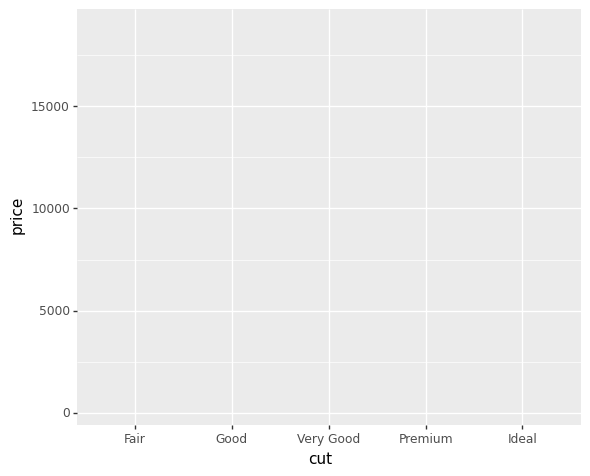

<ggplot: (277230133)>

In [4]:
p10 = ggplot(diamonds, aes("cut", "price"))
p10

## Basic boxplot

We can do this using `geoms`. In the case of a boxplot, we use the `geom_boxplot()` geom.

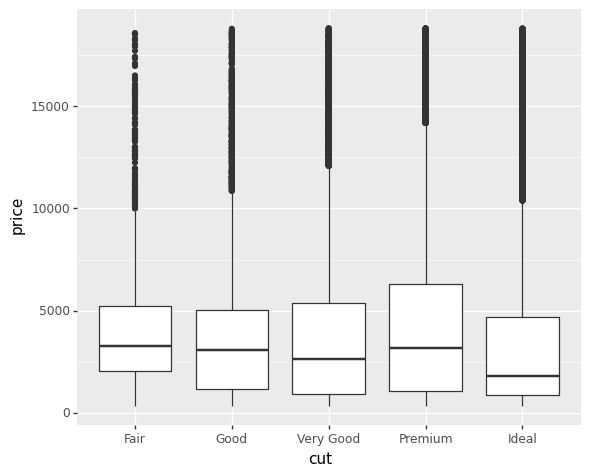

<ggplot: (307760301)>

In [5]:
p10 = ggplot(diamonds, aes("cut", "price")) + geom_boxplot()
p10

## Customising axis labels

In order to change the axis labels, we have used the `xlab` and `ylab` options. In each, we add the desired name as an argument.

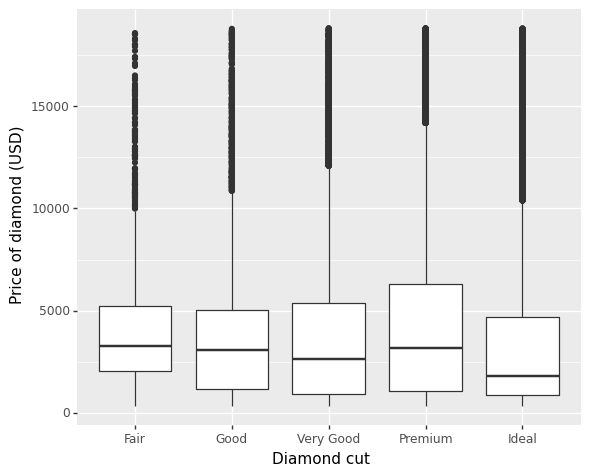

<ggplot: (307860917)>

In [6]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot()
    + xlab("Diamond cut")
    + ylab("Price of diamond (USD)")
)
p10

`ggplot` also allows for the use of multiline names (in both axes and titles). Here, we've changed the y-axis label so that it goes over two lines using the `\n` character to break the line.

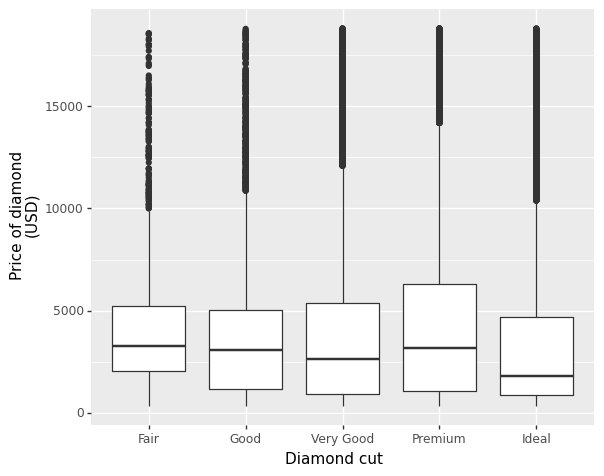

<ggplot: (307807065)>

In [7]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot()
    + xlab("Diamond cut")
    + ylab("Price of diamond\n(USD)")
)
p10

## Changing axis ticks

To change the x-axis tick marks, we can use the `scale_x_continuous` option. Similarly, to change the y-axis we can use the `scale_y_continuous` option. Here we will change the y-axis to every \$2500 rather than the default of \$5000. We can change the breaks using the `breaks` option, which takes a list of values as an argument. You can shortcut having to type in the whole list manually using numpy's `arange` [function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) which generates a sequence from your selected start, stop and step values respectively. Note that because of Python's indexing, you need to set the `stop` argument to be one number more than your desired maximum.

Similarly, you can use the `limits` argument to define the minimum and maximum values of your axis. We've also included this in our `scale_y_continuous` option, increasing the maximum value to \$20000.

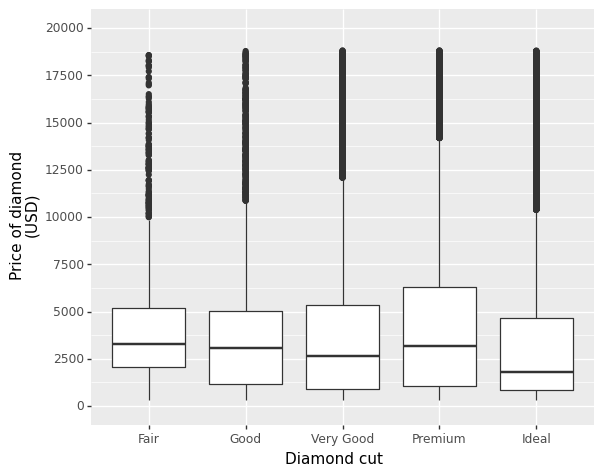

<ggplot: (308361477)>

In [8]:
p10 = (
    ggplot(diamonds, aes("cut", "price")) + geom_boxplot()
    + xlab("Diamond cut") + ylab("Price of diamond\n(USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), limits=[0, 20000])
)
p10

## Adding a title

To add a title, we include the option `ggtitle` and include the name of the graph as a string argument.

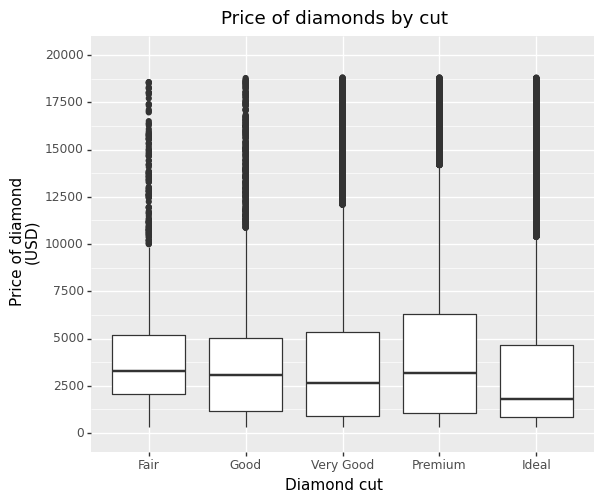

<ggplot: (309141481)>

In [9]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot()
    + xlab("Diamond cut")
    + ylab("Price of diamond\n(USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
)
p10

## Changing the colour of the boxes

To change the line and fill colours of the box plot, we add a valid colour to the `colour` and `fill` arguments in `geom_boxplot()`. `plotnine` uses the colour palette utilised by `matplotlib`, and the full set of named colours recognised by `ggplot` is [here](https://matplotlib.org/examples/color/named_colors.html). Let's try changing our box lines and fills to `rebeccapurple` and `lightskyblue` respectively.

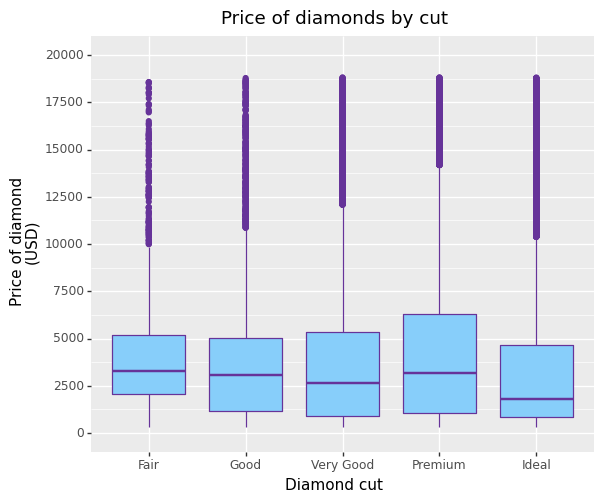

<ggplot: (308612569)>

In [10]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot(colour="rebeccapurple", fill="lightskyblue")
    + xlab("Diamond cut")
    + ylab("Price of diamond\n(USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
)
p10

If you want to go beyond the options in the list above, you can also specify exact HEX colours by including them as a string preceded by a hash, e.g., `"#FFFFFF"`. Below, we have called two shades of blue for the fill and lines using their HEX codes.

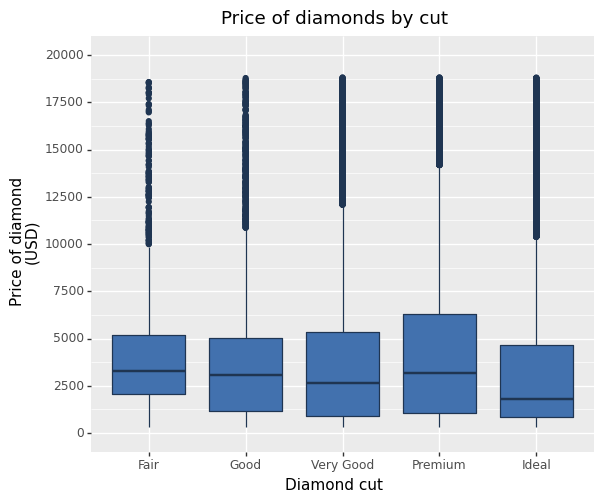

<ggplot: (307788533)>

In [11]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot(colour="#1F3552", fill="#4271AE")
    + xlab("Diamond cut")
    + ylab("Price of diamond\n(USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
)
p10

You can also specify the degree of transparency in the box fill area using the argument `alpha` in `geom_boxplot()`. This ranges from 0 to 1.

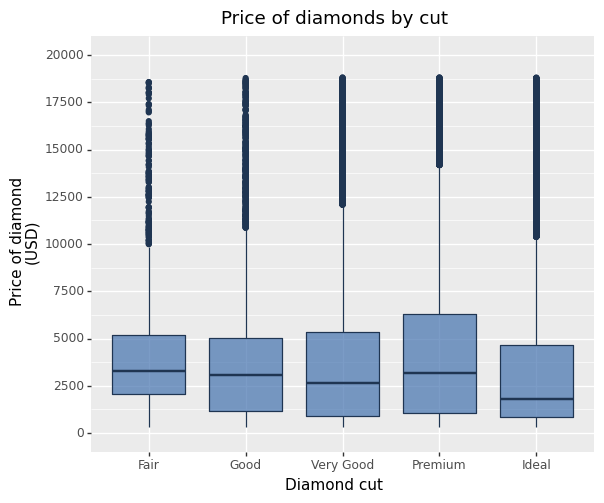

<ggplot: (307794785)>

In [12]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot(colour="#1F3552", fill="#4271AE", 
                   alpha=0.7)
    + xlab("Diamond cut")
    + ylab("Price of diamond\n(USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
)
p10

Finally, you can change the appearance of the outliers as well, using the arguments `outlier.colour` and `outlier.shape` in `geom_boxplot` to change the colour and shape respectively. The shape arguments for `plotnine` are the same as those available in `matplotlib`, and are therefore a little more limited than those in R's implementation of `ggplot2`. Nonetheless, there is a good range of options. The allowed arguments are [here](https://matplotlib.org/api/markers_api.html). Here we will make the outliers small solid circles (using `outlier.shape="."`) and make them coloured `steelblue` (using `outlier.colour="steelblue"`). 

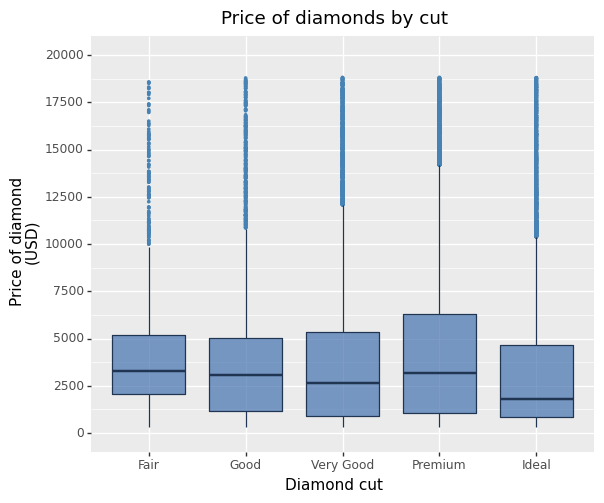

<ggplot: (307788317)>

In [13]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot(
        colour="#1F3552",
        fill="#4271AE",
        alpha=0.7,
        outlier_shape=".",
        outlier_colour="steelblue",
    )
    + xlab("Diamond cut")
    + ylab("Price of diamond\n(USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
)
p10

## Using the white theme

As explained in the previous chapters, we can also change the overall look of the plot using themes. We'll start using a simple theme customisation by adding `theme_bw() `.

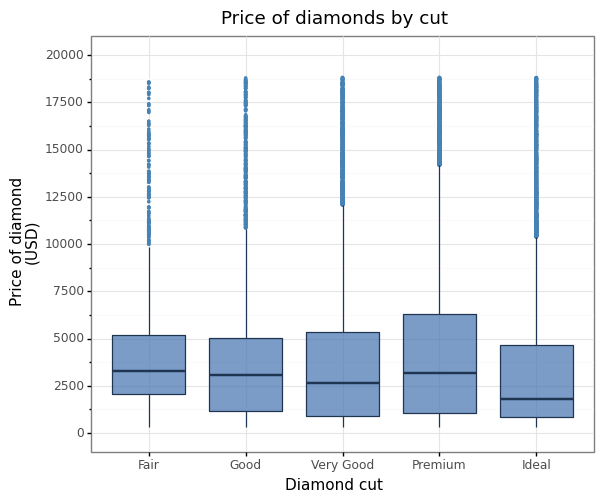

<ggplot: (308735157)>

In [14]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot(
        colour="#1F3552",
        fill="#4271AE",
        alpha=0.7,
        outlier_shape=".",
        outlier_colour="steelblue",
    )
    + xlab("Diamond cut")
    + ylab("Price of diamond\n(USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
    + theme_bw()
)
p10

## Creating an XKCD style chart

Of course, you may want to create your own themes as well. `ggplot` allows for a very high degree of customisation, including allowing you to use imported fonts. `plotnine` already has a `theme_xkcd()` implementation, but we've instead created one from scratch to demonstrate how to use imported fonts and some of the other options in `theme` to tweak the overall look of the graph.

In order to create this chart, you first need to download the XKCD font, which Randall Munroe has kindly provided [here](xkcd.com/1350/xkcd-Regular.otf). Once you have it, you can load it into Python using the `matplotlib.font_manager` class.

In [15]:
import matplotlib.font_manager as fm

#fpath = "path/to/file/xkcd-Regular.otf"
fpath = "/Users/jodieburchell/Documents/plotnine-graph-fonts/xkcd-Regular.otf"

As this is an imported font, we can't change its size directly within the graph. Instead, we need to alter our imported font objects to change the size. As we want a different font size for the title and the body, we will create 2 different font objects, `title_text` and `body_set`.

We can then call methods on these objects (the list of available methods is [here](https://matplotlib.org/api/font_manager_api.html)). For the title, we'll change the font to size 18 and make it bold using the `set_size()` and `set_weight` methods. Similarly, we'll change the body text to size 12.

In [16]:
# Create font objects
title_text = fm.FontProperties(fname=fpath)
body_text = fm.FontProperties(fname=fpath)

# Alter size and weight of font objects
title_text.set_size(18)
title_text.set_weight("bold")

body_text.set_size(12)

In order to get the plot to look more like the XKCD artstyle, we'll make a few more changes. We can alter the values of `axis_line_x` and `axis_line_y` to change the thickness of the axis lines. We can also get rid of the boxes around the legend by setting the argument of `legend_key` to `element_blank()`. We can remove the grid line by changing the value of four parameters: `panel_grid_major`, `panel_grid_minor`, `panel_border` and `panel_background`. To use the XKCD font that we just imported, we need to change the values of both `plot_title` and `text`. Finally, to change the colour of the text to black (from its default grey), we change the values of `axis_text_x` and `axis_text_y`.

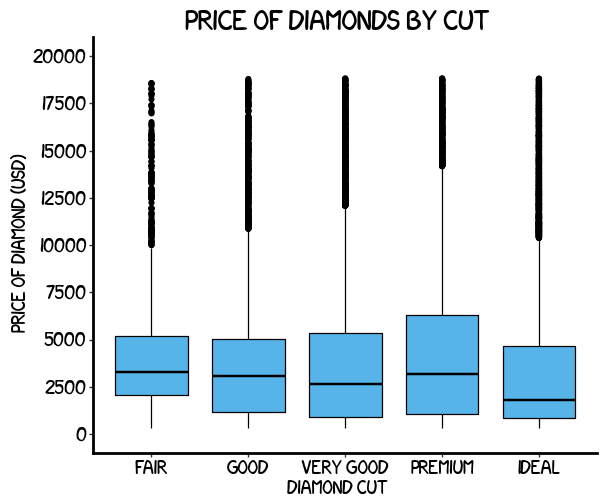

<ggplot: (308612489)>

In [17]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot(colour="black", fill="#56B4E9")
    + xlab("Diamond cut")
    + ylab("Price of diamond (USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
    + theme(
        axis_line_x=element_line(size=2, colour="black"),
        axis_line_y=element_line(size=2, colour="black"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(fontproperties=title_text),
        text=element_text(fontproperties=body_text),
        axis_text_x=element_text(colour="black"),
        axis_text_y=element_text(colour="black"),
    )
)
p10

## Using the ‘Five Thirty Eight’ theme

There are a wider range of pre-built themes available as part of the `ggplot` package (more information on these [here](http://plotnine.readthedocs.io/en/stable/api.html#themes)). Below we've applied `theme_538()`, which approximates graphs in the nice FiveThirtyEight
website. As you can see, we've used the commercially available fonts [‘Atlas Grotesk’](https://commercialtype.com/catalog/atlas/atlas_grotesk) and [‘Decima Mono Pro’](https://www.myfonts.com/fonts/tipografiaramis/decima-mono-pro/) in `axis_title`, `plot_title` and `text`. This is just to make the plots exactly like those on the site, and is entirely optional.

In [18]:
#agm = "path/to/file/AtlasGrotesk-Medium.otf"
#agr = "path/to/file/AtlasGrotesk-Regular.otf"
#dp = "path/to/file/DecimaMonoPro.otf"

agm = "/Users/jodieburchell/Documents/plotnine-graph-fonts/atlas-grotesk/AtlasGrotesk-Medium.otf"
agr = "/Users/jodieburchell/Documents/plotnine-graph-fonts/atlas-grotesk/AtlasGrotesk-Regular.otf"
dp = "/Users/jodieburchell/Documents/plotnine-graph-fonts/decima mono/DecimaMonoPro.otf"

# Create font objects
title_text = fm.FontProperties(fname=agm)
axis_text = fm.FontProperties(fname=agr)
body_text = fm.FontProperties(fname=dp)

# Alter size and weight of font objects
title_text.set_size(16)
axis_text.set_size(12)
body_text.set_size(10)

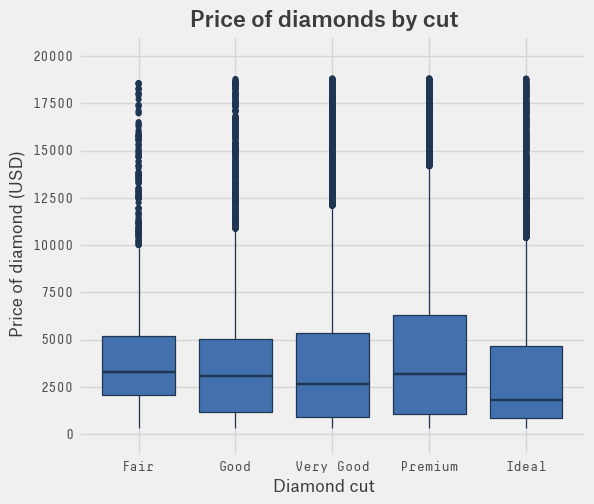

<ggplot: (312128601)>

In [19]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot(colour="#1F3552", fill="#4271AE")
    + xlab("Diamond cut")
    + ylab("Price of diamond (USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
    + theme_538()
    + theme(
        axis_title=element_text(fontproperties=axis_text),
        plot_title=element_text(fontproperties=title_text),
        text=element_text(fontproperties=body_text),
    )
)
p10

## Creating your own theme

Now that we've explored some of the options available in plot customisation, we can now build our own completely customised graph. Changing the `size` and `colour` arguments of `axis_line` allows us to thicken the lines and change their colour to black. Similarly, changing the colour argument passed to `panel_grid_major` means that all of our major grid lines are now light grey. We removed the minor grid lines and background by changing the arguments of `panel_grid_minor`, `panel_border` and `panel_background`, and finally, we've changed the font using the standard font Tahoma.

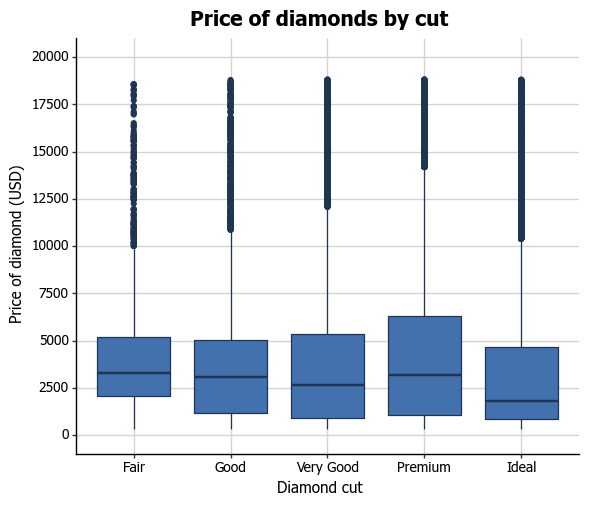

<ggplot: (312706901)>

In [20]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot(colour="#1F3552", fill="#4271AE")
    + xlab("Diamond cut")
    + ylab("Price of diamond (USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
    + theme(
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=15, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=11),
        axis_text_x=element_text(colour="black", size=10),
        axis_text_y=element_text(colour="black", size=10),
    )
)
p10

## Boxplot extras

An extra feature you can add to boxplots is to overlay all of the points for that group on each boxplot in order to get an idea of the sample size of the group. This can be achieved using by adding the `geom_jitter()` option. As `diamonds` is a large dataset, we'll first take a small sample to illustrate this.

In [21]:
diamonds_sample = diamonds.sample(1000)

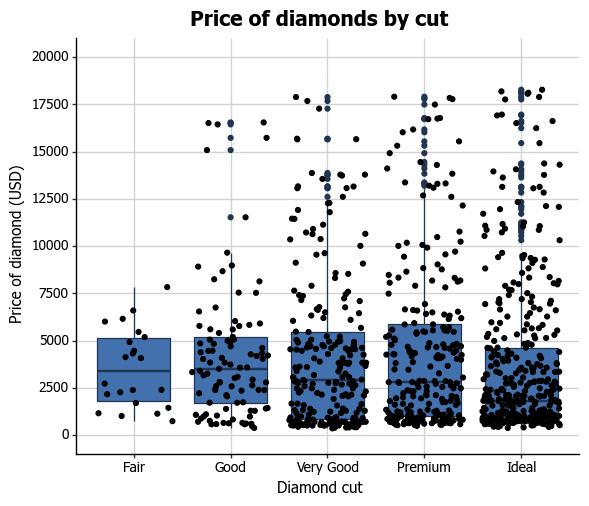

<ggplot: (307778881)>

In [22]:
p10 = (
    ggplot(diamonds_sample, aes("cut", "price"))
    + geom_boxplot(colour="#1F3552", fill="#4271AE")
    + geom_jitter()
    + xlab("Diamond cut")
    + ylab("Price of diamond (USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
    + theme(
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=15, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=11),
        axis_text_x=element_text(colour="black", size=10),
        axis_text_y=element_text(colour="black", size=10),
    )
)
p10

We can see that the `Fair` group has a smaller sample than the other categories, indicating that it may not give as reliable information as the other cut types.

Another thing you can do with your boxplot is add a notch to the box where the median sits to give a clearer visual indication of how the data are distributed within the IQR. You achieve this by adding the argument `notch=True` to the `geom_boxplot()` geom.

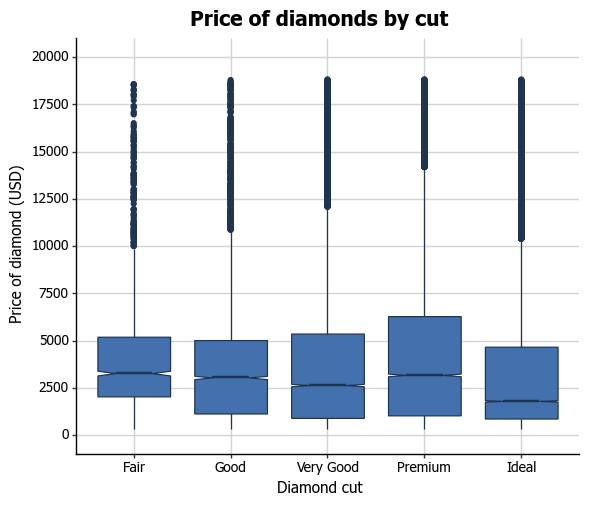

<ggplot: (312186997)>

In [23]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot(colour="#1F3552", fill="#4271AE", 
                   notch=True)
    + xlab("Diamond cut")
    + ylab("Price of diamond (USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
    + theme(
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=15, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=11),
        axis_text_x=element_text(colour="black", size=10),
        axis_text_y=element_text(colour="black", size=10),
    )
)
p10

## Grouping by another variable

You can also easily group boxplots by the levels of another variable. There are two options, in separate (panel) plots, or in the same plot.

We first need to do a little data wrangling. To create our grouping variable, we'll median-split `carat` so that this is categorical, and made it into a new labelled factor variable called `carat_c`.

In order to produce a panel plot by this categorical carat variable, we add the `facet_grid(".~carat_c")` option to the plot. Note that unlike in R's `ggplot`, you need to include the arguments in `facet_grid` in quote marks.

In [24]:
diamonds["carat_c"] = pd.qcut(
    diamonds["carat"], 2, labels=["Lower carat", "Higher carat"]
)

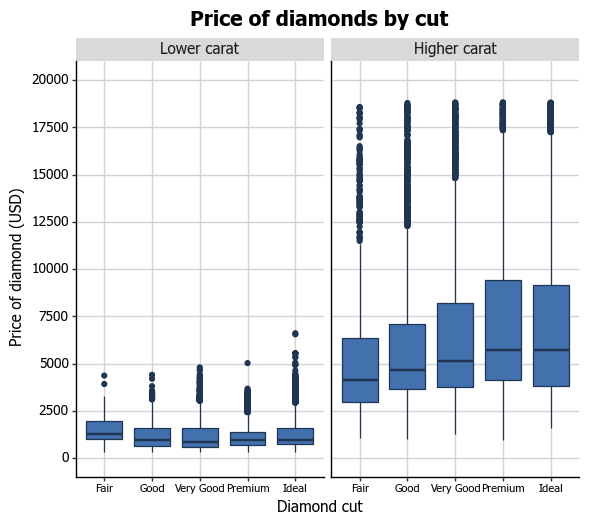

<ggplot: (307888021)>

In [25]:
p10 = (
    ggplot(diamonds, aes("cut", "price"))
    + geom_boxplot(colour="#1F3552", fill="#4271AE")
    + xlab("Diamond cut")
    + ylab("Price of diamond (USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
    + theme(
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=15, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=11),
        axis_text_x=element_text(colour="black", size=8),
        axis_text_y=element_text(colour="black", size=10),
    )
    + facet_grid(". ~ carat_c")
)
p10

In order to plot the two `carat` levels in the same plot, we need to add a couple of things. Firstly, in the `ggplot` function, we add a `fill=carat_c` argument to `aes`. Secondly, we change the manual colours using the schemes from [ColorBrewer](http://colorbrewer2.org/). Here we have used the `scale_fill_brewer` option with the quantitative scale `Accent`. More information on using `scale_colour_brewer` is [here](http://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_color_brewer.html#plotnine.scales.scale_color_brewer). 

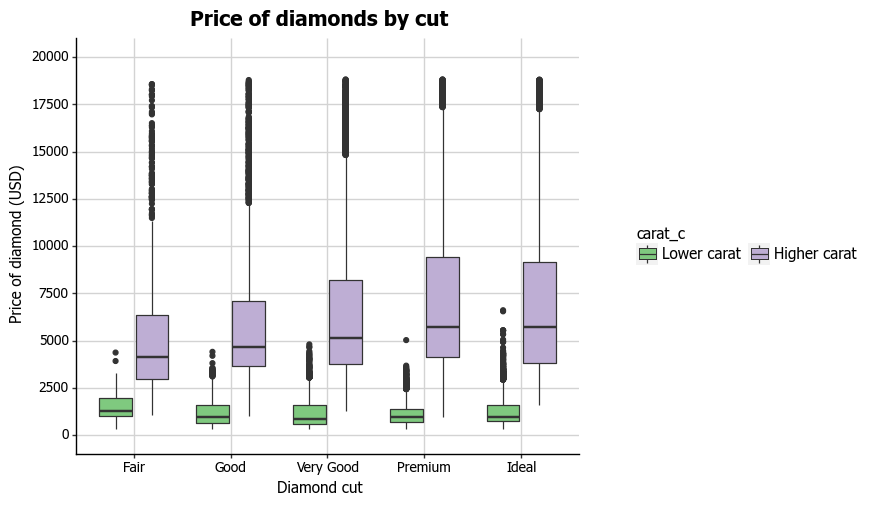

<ggplot: (308177141)>

In [26]:
p10 = (
    ggplot(diamonds, aes("cut", "price", fill="carat_c"))
    + geom_boxplot()
    + xlab("Diamond cut")
    + ylab("Price of diamond (USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
    + theme(
        legend_direction="horizontal",
        legend_box_spacing=0.4,
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=15, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=11),
        axis_text_x=element_text(colour="black", size=10),
        axis_text_y=element_text(colour="black", size=10),
    )
    + scale_fill_brewer(type="qual", palette="Accent")
)
p10

## Formatting the legend

Finally, we can format the legend. Firstly, we can change the position by adding the `legend_position="bottom"` argument to the `theme` option, which moves the legend under the plot. We can change the orientation of the legend to horizontal by then adding `legend_direction="horizontal"` to `theme`. We can also centre the legend by adding `legend_title_align="center"`. We can adjust the legend position using `legend_box_spacing=0.4`. We can get rid of the grey background behind the legend keys using `legend_key=element_blank()`. Lastly, we can fix the title by adding the `name="Diamond carat"` argument to the `scale_fill_brewer` option.

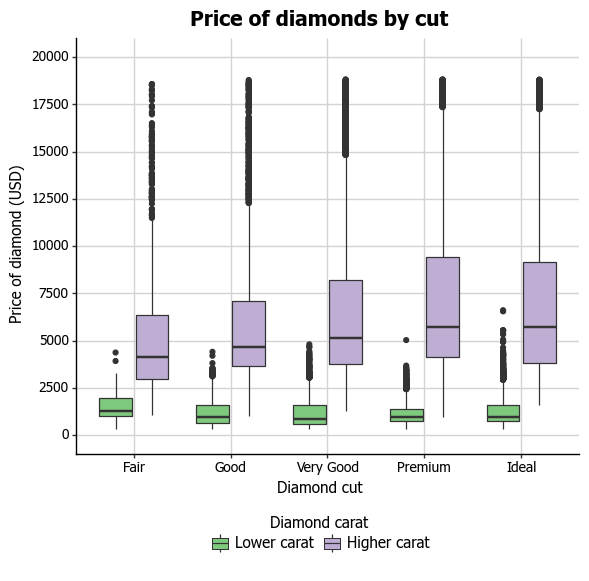

<ggplot: (308220313)>

In [27]:
p10 = (
    ggplot(diamonds, aes("cut", "price", fill="carat_c"))
    + geom_boxplot()
    + xlab("Diamond cut")
    + ylab("Price of diamond (USD)")
    + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
                         limits=[0, 20000])
    + ggtitle("Price of diamonds by cut")
    + theme(
        legend_position="bottom",
        legend_direction="horizontal",
        legend_title_align="center",
        legend_box_spacing=0.4,
        legend_key=element_blank(),
        axis_line=element_line(size=1, colour="black"),
        panel_grid_major=element_line(colour="#d3d3d3"),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=15, family="Tahoma", 
                                face="bold"),
        text=element_text(family="Tahoma", size=11),
        axis_text_x=element_text(colour="black", size=10),
        axis_text_y=element_text(colour="black", size=10),
    )
    + scale_fill_brewer(type="qual", palette="Accent", 
                        name="Diamond carat")
)
p10

And with that, we have recreated the plot at the beginning of this blog post! I hope you found this helped you get your feet wet with `plotnine` and see the potential you have to create plots as beautiful as those from `ggplot`.